# Numeric Prediction
In this activity We will become familiar with several models for **predicting numeric outcomes**.

This is another example using the EmployeeSatisfaction data. The only difference is in Data preparation steps (compared to Activity1).

In [1]:
# make sure to upload the dataset to your colab folder before proceeding (see instructions in 1_GettingStarted)
#loading the 50_startups datasets as a panda dataframe
import pandas as pd
dataset = pd.read_csv('EmpSatisfaction.csv')

FileNotFoundError: ignored

In [ ]:
#take a look a descriptive statistics
dataset.describe()

,Employee ID,Age,Gender,Education Level,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole,JobSatisfactionRating
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.00000
mean,313.000000,36.900800,0.595200,2.892800,90.150400,3.974400,2.865600,40.934400,3.163200,7.060800,4.267200,6.82400
std,180.566239,9.344189,0.491246,1.036063,41.455836,2.575025,3.306634,7.576988,0.369844,6.446487,3.667769,1.75897
min,1.000000,18.000000,0.000000,1.000000,30.000000,1.000000,0.000000,16.000000,3.000000,0.000000,0.000000,2.00000
25%,157.000000,30.000000,0.000000,2.000000,59.000000,2.000000,0.000000,40.000000,3.000000,3.000000,2.000000,6.00000
50%,313.000000,35.000000,1.000000,3.000000,79.000000,3.000000,1.000000,40.000000,3.000000,5.000000,3.000000,7.00000
75%,469.000000,43.000000,1.000000,4.000000,122.000000,6.000000,4.000000,45.000000,3.000000,9.000000,7.000000,8.00000
max,625.000000,60.000000,1.000000,5.000000,193.000000,10.000000,15.000000,96.000000,4.000000,40.000000,18.000000,10.00000


## Visually exploring our dataset
We will use the seaborn library to create some visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


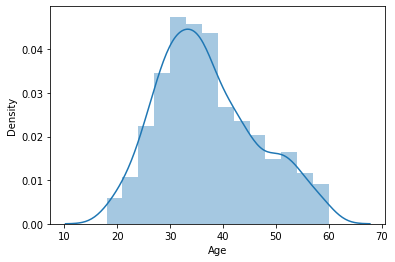

In [ ]:
#visually exploring the dataset
#the next few cells demonstrate several graphs that can be useful to visually explore your data
import seaborn as sb
sb.distplot(dataset['Age']) #histogram for R&D spending

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


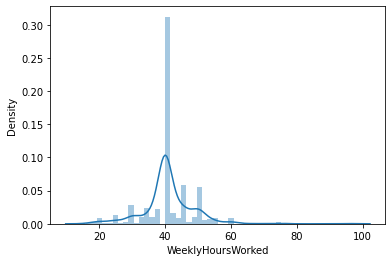

In [ ]:
sb.distplot(dataset['WeeklyHoursWorked']) #histogram for Administration spending

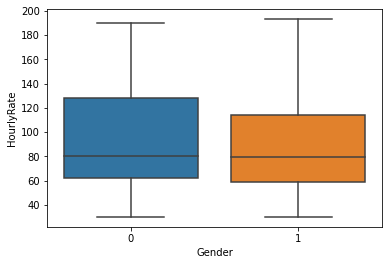

In [ ]:
#comparing R&D spending across states using box
sb.boxplot(x="Gender",y="HourlyRate", data=dataset)

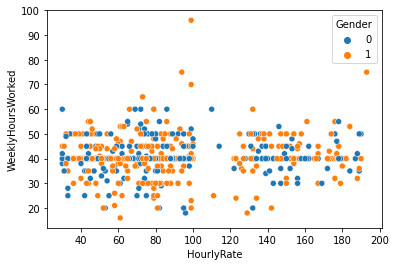

In [ ]:
#scatter plot of Profits vs. Marketing Spending, colored by State
sb.scatterplot(x="HourlyRate",y="WeeklyHoursWorked",hue="Gender", data=dataset)


## Preparing data for model training

In [ ]:
#defining input and outcome variables
y = dataset[['JobSatisfactionRating']]  #profit

X = dataset.drop(['Employee ID','JobSatisfactionRating'],axis=1) #other variables

In [ ]:
#before encoding the State variable
X.head(3)

,Age,Gender,Education Level,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole
0,41,0,2,94,2,3,40,3,6,4
1,49,1,1,61,8,1,47,4,10,7
2,37,1,2,92,1,0,40,3,0,0


In [ ]:
#The state variable is categorical,
#we use binary encoding to create binary variable for each level of the State variable
pd.get_dummies(X['Education Level']).head(3)

,1,2,3,4,5
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0


In [ ]:
#add the binary encoded Education Level variables to our X variable
X=pd.concat([X,pd.get_dummies(X['Education Level'])],axis=1)
# drop the Education Level column, since we now have the binary encoded vars
X.drop(['Education Level'],axis=1,inplace=True)

In [ ]:
#after encoding the State variable
X.drop([5],axis=1,inplace=True)
X.head(3)

,Age,Gender,HourlyRate,JobLevel,YearsSincePromotion,WeeklyHoursWorked,LastPerformanceRating,YearsAtCompany,YearsCurrentRole,1,2,3,4
0,41,0,94,2,3,40,3,6,4,0,1,0,0
1,49,1,61,8,1,47,4,10,7,1,0,0,0
2,37,1,92,1,0,40,3,0,0,0,1,0,0


## Splitting the data into Train and Test sets

We split the dataset: keep 20% for testing and the rest for training

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)  #using same random_state value for replicability


In [ ]:
# let's take another look at the resulting datasets after splitting
X_train.describe()

## Linear regression model

In [ ]:
#### Fitting Multiple Linear Regression to the Training set  ####
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred_lin = lin_reg.predict(X_test)

importing model evaluation metrics from sklearn

In [ ]:
from sklearn import metrics
import math
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_lin))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_lin)))
# The mean absolute error
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_lin))
# R-square: 1 is perfect prediction
#print('R-square: %.2f' % metrics.r2_score(Y_test, y_pred_lin))


Coefficients: 
 [[ 0.00482626  0.11256414  0.02779865  0.12167708 -0.06548434  0.00243174
  -0.24522371 -0.01698523  0.02745693 -0.15480991 -0.11070706 -0.25659579
  -0.32734171]]
Root Mean squared error: 1.13
Mean absolute error: 0.90


## Decision Tree Regression model

In [ ]:
#### Fitting Decision Tree Regression to the dataset  ###########
from sklearn.tree import DecisionTreeRegressor
DecTree_reg = DecisionTreeRegressor(random_state = 123)
DecTree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [ ]:
# evaluating Decision Tree Regression
y_pred_DT = DecTree_reg.predict(X_test)
# The mean squared error
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_DT)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_DT))

Root Mean squared error: 1.65
Mean absolute error: 1.23


## Random Forest Regression

In [ ]:
#### Fitting Random Forest Regression to the dataset ##########
from sklearn.ensemble import RandomForestRegressor
RandForest_reg = RandomForestRegressor(n_estimators = 20, min_samples_leaf=5, random_state = 0)
RandForest_reg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#evaluting RandForest_reg
y_pred_RF = RandForest_reg.predict(X_test)
#print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_RF))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_RF))

Root Mean squared error: 1.14
Mean absolute error: 0.91


## Support Vector Regression

In [ ]:
#########  Support Vector Regression #########
# Feature Scaling
from sklearn.preprocessing import StandardScaler,minmax_scale
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(Y_train) #.reshape(-1,1)

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train_sc, y_train_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# evaluating SVR regresion
y_pred = svr_reg.predict(sc_X.fit_transform(X_test))
y_pred_SVC = sc_y.inverse_transform(y_pred) #inverse applying the scaler

#print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, y_pred_SVC))
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_SVC)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_SVC))

Root Mean squared error: 1.16
Mean absolute error: 0.92


##Comparing Different models


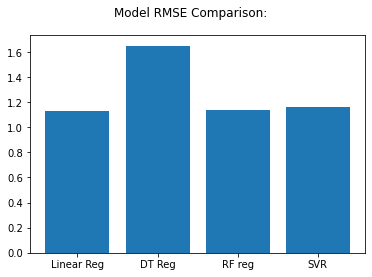

In [ ]:
import matplotlib.pyplot as plt
names = ['Linear Reg','DT Reg','RF reg','SVR']
predictions=[y_pred_lin,y_pred_DT,y_pred_RF,y_pred_SVC]
results = []

for y_pred in predictions:
  rmse=round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2)
  #mae=round(metrics.mean_absolute_error(Y_test, y_pred),2)
  results.append(rmse) #change rmse to mae

# create a bar plot to compare values
fig = plt.figure()
fig.suptitle('Model RMSE Comparison: ')
ax = fig.add_subplot(111)
plt.bar(names,results)
plt.show()

In [ ]:
results

[1.13, 1.65, 1.14, 1.16]